# An example of using the calculation of the cost of the algorithm and its calculation

In [1]:
#Required packages to be installed
#pip install qiskit-optimization
#pip install cplex docplex



imports of qubo files

In [2]:
%%capture
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from qubo import AlgoritmQAOA
#from costdc import PlatformsViewController
from ipynb.fs.full.calccost_for_different_depths import PlatformsViewController

An example of calculating the cost of an algorithm

In [3]:
nodes = 4

# Energy cost for having node occupied. It is negative so it is favourable for having this occupied.
weights_nodes = [-2,-2,-2,-2,-2,-2]

# Cost for having two connected nodes occupied. This may counteract the positive benefit (weights_nodes)
# for having the nodes occupied, and leads to the complexity for the problem.
weights_edges = [1,2,2,1]


W = [[1, -2  , -2  , -2],
     [0, 2, -2 , -2],
     [0, 0  , 2, -2],
     [0, 0  , 0  , 1],
    ]

alg = []
qc =[]
for p in range(1,11):
    alg.append( AlgoritmQAOA(W, reps = p ))
    qc.append(  alg[p-1].get_circuit() ) 
    


Text(0, 0.5, 'costs in $')

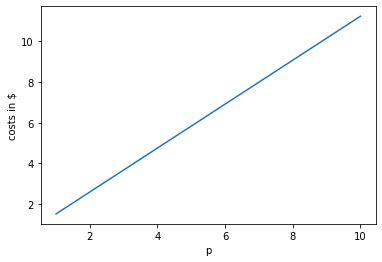

In [4]:
import  matplotlib.pyplot as plt
costs = []
for p in range(1,11):
    view = PlatformsViewController(qc[p-1])
    costs.append( view.get_cost_27(2, 1000) ) 
plt.plot(range(1,11), costs)
plt.xlabel('p')
plt.ylabel('costs in $')

Finding the optimal solution

In [ ]:
results = []
for p in range(1,11):
    results.append(alg[p-1].solve())

Rendering result

In [ ]:
for p in range(1,11):
    vr = alg[p-2].result.get_value_solution()
    plot_value(vr)



In this simple case there it is monetary disadvantageous to increase p, as there is no accuracy advantage.

We need to consider more complex example. 

There were various problem types that can be formulated a QUBO, [here](https://blog.xa0.de/post/List-of-QUBO-formulations/#fn:S20) and [here](https://or.stackexchange.com/questions/828/what-are-some-real-world-applications-of-qubo/978#978) you find a list of QUBO formulations of problems, QAOA is applicable on for solving it. 

Another QUBO usecase is **sensor position optimization** described [here](https://crowd-innovation.bmwgroup.com/servlet/hype/IMT?documentTableId=7025714350976893092&userAction=Browse&templateName=&documentId=740c3d47812c470b208a495d85f18206) 

To keep the considered matrix small, we will consider another use case from Fujitsu presented [here](https://www.youtube.com/watch?v=dA7Nbarm4UM). Reflectors and Lens with different tolerance limits are given and must together comply with the total tolerance.
Given five gears of each type, there are 5!= 120 possible combinations. This example consits of a graph with 10 nodes an 5 vertices

In [ ]:

reflector_tol= [1.06, 0.99, 1.07, 1.05, 1.06]
lens_tol = [1.01, 0.99, 0.98, 0.99, 1.0]

#combined_tol is the average of both and neeed to be equal to total_tol

total_tol = 1.0
# an deviation on 0.025 is allowed

#unfinished